##### Hello, MNIST

In [1]:
# import mnist dataset from sklearn
from sklearn.datasets import load_digits

In [3]:
# load_digits() is a short version of mnist dataset
"""
mnist = load_digits()
x, y = mnist['data'], mnist['target']

print(type(x), x.shape)
print(type(y), y.shape)
"""

<class 'numpy.ndarray'> (1797, 64)
<class 'numpy.ndarray'> (1797,)


In [2]:
# import mnist dataset from sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x, y = mnist['data'], mnist['target']
x.shape, y.shape

((70000, 784), (70000,))

In [3]:
print(type(x))
print(type(y))
print(y.dtypes)
print([type(i) for i in y[:1]])

# since y' dtype is str, we need to convert it to float
y = y.astype(float)
print([type(i) for i in y[:1]])

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
category
[<class 'str'>]
[<class 'float'>]


In [4]:
# normalize x to keep our gradients manageable
x = x / 255

In [5]:
# to build a zero-classifier, make the label 1 when we have a zero, and 0 otherwise
import numpy as np
y_new = np.zeros(shape=y.shape)
y_new[np.where(y == 0.0)] = 1
y = y_new

In [19]:
# we can make our train/test split. we'll also transform the data into the shape we want, with each example in a column(instead of a row)
m = 60000
m_test = x.shape[0] - m

x_train, x_test = x[:m].T, x[m:].T
y_train, y_test = y[:m].reshape(1,m), y[m:].reshape(1,m_test)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.loc[:,0].shape, y_train[:1,0].shape)
print()
print(x_train.iloc[:3, 0])
print(y_train[0, :3])

(784, 60000) (1, 60000) (784, 10000) (1, 10000)
(784,) (1,)

pixel1    0.0
pixel2    0.0
pixel3    0.0
Name: 0, dtype: float64
[0. 1. 0.]


In [20]:
print(x_train.index)
print(x_test.index)

# since 

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)
Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)


In [21]:
# finally we shuffle the training set for good measure
np.random.seed(138)
shuffle_index = np.random.permutation(m)
x_train, y_train = x_train.loc[:, shuffle_index], y_train[:, shuffle_index]
print(x_train.shape, y_test.shape)

(784, 60000) (1, 10000)


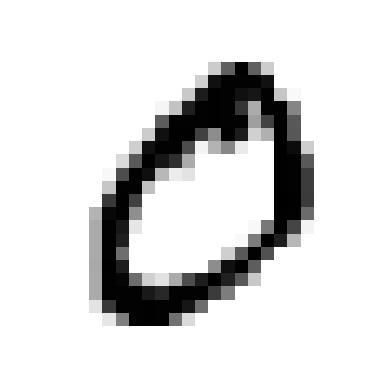

1.0


In [22]:
# take a look at a random image
import matplotlib
import matplotlib.pyplot as plt

i = 1
plt.imshow(x_train.loc[:, i].values.reshape(28, 28), cmap=matplotlib.cm.binary)
plt.axis('off')
plt.show()
print(y_train[0][i])

##### Build & Train

In [29]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

def compute_loss(Y, Y_hat):
    m = Y.shape[1]
    L = -(1.0/m) * (np.sum(np.multiply(np.log(Y_hat), Y)) + np.sum(np.multiply(np.log(1-Y_hat), (1-Y))))

In [23]:
learning_rate = 1

In [24]:
X, Y = x_train, y_train
print(X.shape, Y.shape)

(784, 60000) (1, 60000)


In [25]:
n_x = X.shape[0]    # number of features
m = X.shape[1]      # number of examples
print(n_x, m)

784 60000


In [26]:
W = np.random.randn(n_x, 1) * 0.01
b = np.zeros((1,1))
print(W.shape, b.shape)

(784, 1) (1, 1)


In [36]:
Z = np.matmul(W.T, X) + b
print(Z.shape)

A = sigmoid(Z)
print(A.shape)


(1, 60000)
(1, 60000)


C:\Users\rubin\AppData\Local\Temp\ipykernel_12860\487067582.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  Z = np.matmul(W.T, X) + b


In [34]:
for i in range(2000):
    Z = np.matmul(W.T, X) + b
    A = sigmoid(Z)
    
    cost = compute_loss(Y, A)
    
    dW = (1/m) * np.matmul(X, (A-Y).T)
    db = (1/m) * np.sum((A-Y).T)
    
    W -= learning_rate * dW
    b -= learning_rate * db
    
    if (i % 100 == 0):
        print(f"Epoch {i}   cost : {cost}")
        
print("f{Final cost : {cost}}")

C:\Users\rubin\AppData\Local\Temp\ipykernel_12860\2482893050.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  Z = np.matmul(W.T, X) + b
C:\Users\rubin\AppData\Local\Temp\ipykernel_12860\2482893050.py:7: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg

(784, 1)


ValueError: Data must be 1-dimensional